# Title of Project

## Women Cloth Reviews Prediction With Multi Nomial Navie Bayes

# Objective 


The project aims to use a Multinomial Naive Bayes classifier to predict sentiment in women's clothing reviews accurately. This involves feature extraction, handling imbalanced data, hyperparameter tuning, and ensuring model interpretability. Evaluation metrics will be used to assess performance, with a focus on generalization to new data and deployment into production. Continuous improvement and ethical considerations are also central to the project.

# Data Source

Dataset is collected from kaggle datasets

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

C:\Users\purni\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import Data

In [2]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


# Describe Data

In [4]:
df.shape

(23486, 11)

In [5]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

# Data Visualization

<AxesSubplot:>

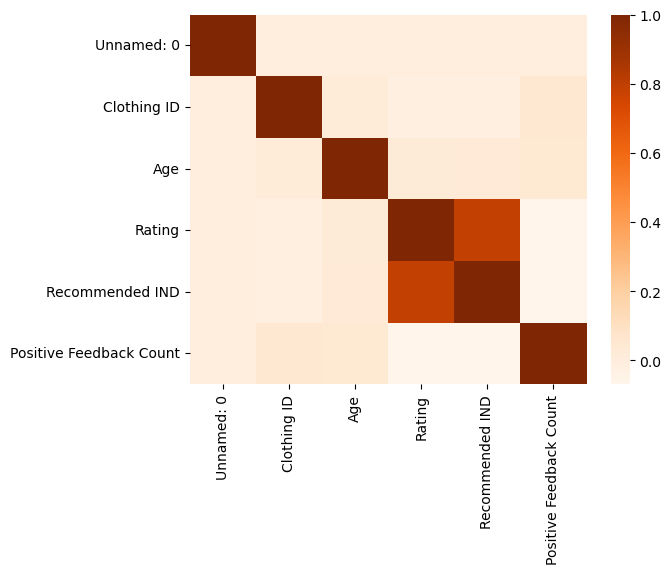

In [9]:
sns.heatmap(df.corr(),cmap="Oranges")

C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

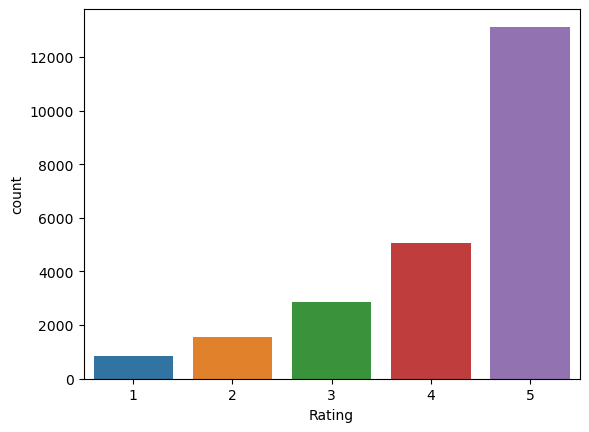

In [10]:
sns.countplot(df.Rating)

C:\Users\purni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department Name', ylabel='count'>

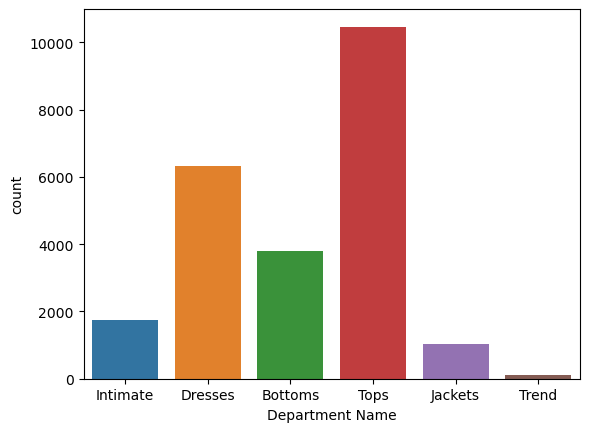

In [11]:
sns.countplot(df['Department Name']) # the more purchase is Tops

# Data Prepration

In [12]:
df.drop(['Unnamed: 0', 'Clothing ID','Division Name','Class Name'],axis=1)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Department Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimate
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Bottoms
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,Tops
...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,Tops
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,Dresses


In [13]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [14]:
df[df['Review Text']==""]=np.NaN

In [15]:
df['Review Text'].fillna("No Review",inplace=True)

In [16]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [17]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 23486, dtype: object

# Define Target Variable(y) and Feature Variables(X)

In [18]:
x=df['Review Text']

In [19]:
y=df['Rating']

In [20]:
df['Rating'].value_counts()

5.0    13131
4.0     5077
3.0     2871
2.0     1565
1.0      842
Name: Rating, dtype: int64

# Train Test Split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17614,), (5872,), (17614,), (5872,))

# Modeling

In [23]:
cv=CountVectorizer(lowercase=True,analyzer='word',ngram_range=(2,3),stop_words="english",max_features=50000)

In [24]:
x_train=cv.fit_transform(x_train)

In [25]:
cv.get_feature_names_out()

array(['00 fits', '00 petite', '00 regular', ..., 'zipper zip',
       'zippered pockets', 'zippers buttons'], dtype=object)

In [26]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
x_test=cv.fit_transform(x_test)

In [28]:
cv.get_feature_names_out()

array(['00 petite', '00 regular', '00p 0p', ..., 'zipper pockets',
       'zipper split', 'zipper style'], dtype=object)

In [29]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
model=MultinomialNB()

In [31]:
model.fit(x_train,y_train)

MultinomialNB()

In [32]:
y_pred=model.predict(x_test)

In [33]:
y_pred

array([1., 5., 5., ..., 1., 3., 2.])

# Model Evaluation

In [34]:
confusion_matrix(y_test,y_pred)

array([[  62,   37,   30,   32,   33],
       [ 139,   75,   58,   56,   79],
       [ 278,  148,  102,  100,  138],
       [ 450,  245,  176,  152,  236],
       [1117,  560,  475,  392,  702]], dtype=int64)

In [35]:
print('--------------------Classification Report-------------------------')
print()
print(classification_report(y_test,y_pred))

--------------------Classification Report-------------------------

              precision    recall  f1-score   support

         1.0       0.03      0.32      0.06       194
         2.0       0.07      0.18      0.10       407
         3.0       0.12      0.13      0.13       766
         4.0       0.21      0.12      0.15      1259
         5.0       0.59      0.22      0.32      3246

    accuracy                           0.19      5872
   macro avg       0.20      0.19      0.15      5872
weighted avg       0.39      0.19      0.23      5872



# Prediction

In [36]:
y_pred=model.predict(x_test)

In [37]:
y_pred

array([1., 5., 5., ..., 1., 3., 2.])

# Explaination